In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from stattests.tests import *
from stattests.generation import generate_data
from stattests.utils import plot_cdf, plot_summary
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm

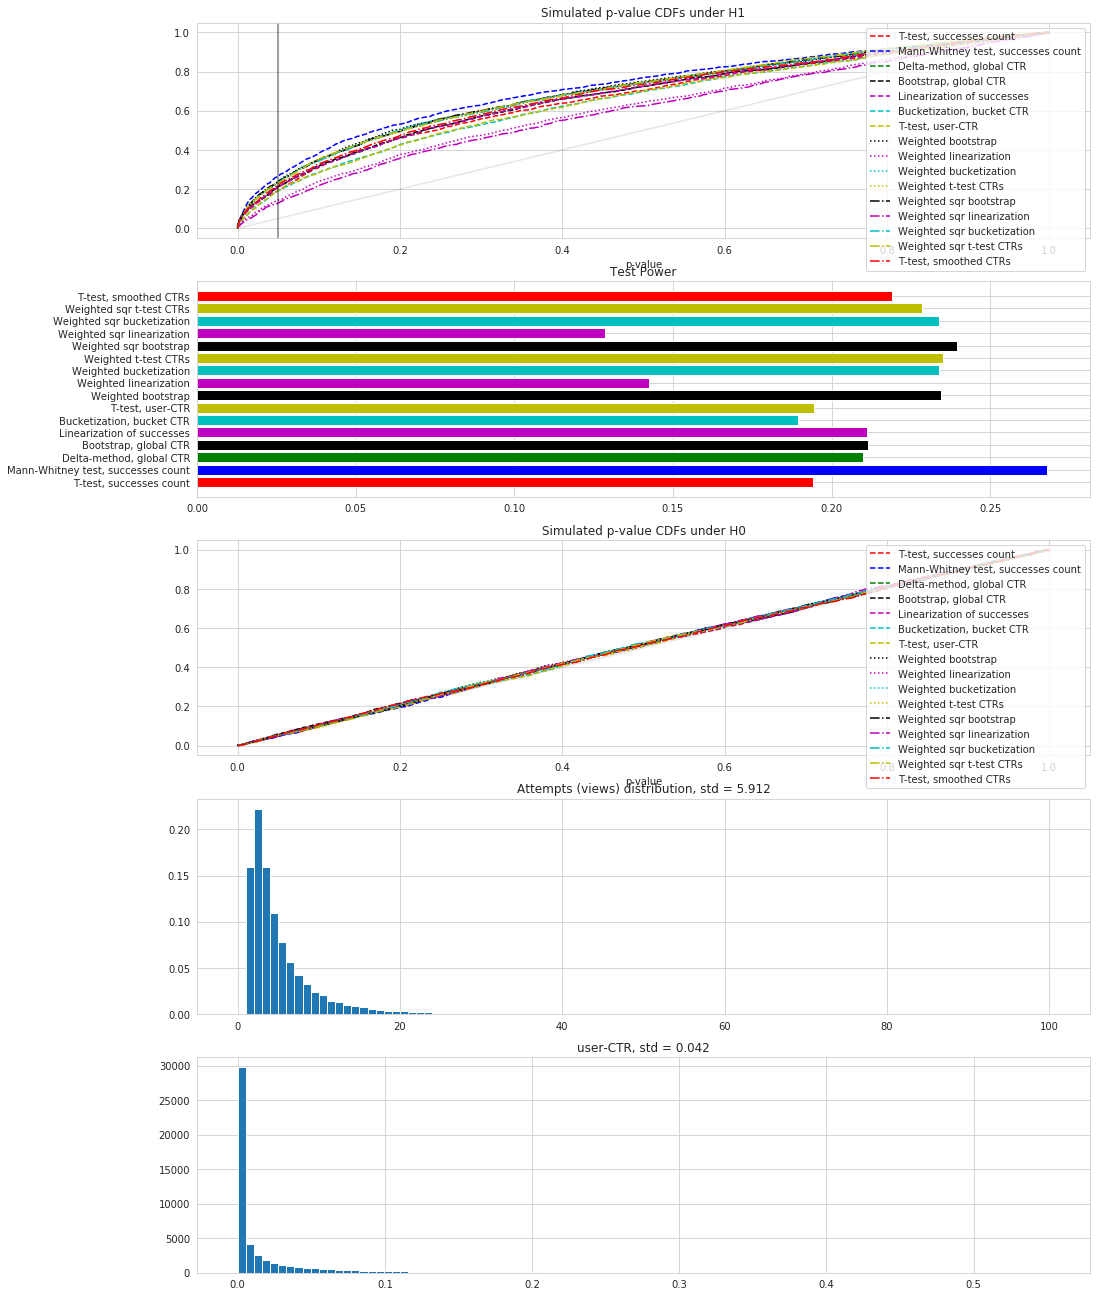

In [10]:
success_rate = 0.02
uplift = 0.1
beta = 10
skew = 1

attempts_0_ab, successes_0_ab, attempts_1_ab, successes_1_ab, gt_success_rates = \
    generate_data(skew=skew, uplift=uplift, beta=beta, success_rate=success_rate)
attempts_0_aa, successes_0_aa, attempts_1_aa, successes_1_aa, _ = \
    generate_data(skew=skew, uplift=0, beta=beta, success_rate=success_rate)

ttest_successes_count_ab = t_test(successes_0_ab, successes_1_ab)
mannwhitney_successes_count_ab = mannwhitney(successes_0_ab, successes_1_ab)
ttest_successes_count_aa = t_test(successes_0_aa, successes_1_aa)
mannwhitney_successes_count_aa = mannwhitney(successes_0_aa, successes_1_aa)

delta_ab = delta_method_ctrs(successes_0_ab, attempts_0_ab, successes_1_ab, attempts_1_ab)
delta_aa = delta_method_ctrs(successes_0_aa, attempts_0_aa, successes_1_aa, attempts_1_aa)
bootstrap_ab = bootstrap(successes_0_ab / attempts_0_ab, attempts_0_ab,
                         successes_1_ab / attempts_1_ab, attempts_1_ab)
bootstrap_aa = bootstrap(successes_0_aa / attempts_0_aa, attempts_0_aa,
                         successes_1_aa / attempts_1_aa, attempts_1_aa)
linearized_0_ab, linearized_1_ab = linearization_of_successes(successes_0_ab, attempts_0_ab, 
                                                              successes_1_ab, attempts_1_ab)
linearized_0_aa, linearized_1_aa = linearization_of_successes(successes_0_aa, attempts_0_aa, 
                                                              successes_1_aa, attempts_1_aa)
linearization_ab = t_test(linearized_0_ab, linearized_1_ab)
linearization_aa = t_test(linearized_0_aa, linearized_1_aa)

buckets_ab = buckets(successes_0_ab / attempts_0_ab, np.ones(shape=attempts_0_ab.shape),
                     successes_1_ab / attempts_1_ab, np.ones(shape=attempts_1_ab.shape))
buckets_aa = buckets(successes_0_aa / attempts_0_aa, np.ones(shape=attempts_0_aa.shape),
                     successes_1_aa / attempts_1_aa, np.ones(shape=attempts_1_aa.shape))
t_test_ctrs_ab = t_test(successes_0_ab / attempts_0_ab, successes_1_ab / attempts_1_ab)
t_test_ctrs_aa = t_test(successes_0_aa / attempts_0_aa, successes_1_aa / attempts_1_aa)

corr_aware_w_0_ab, corr_aware_w_1_ab = intra_user_correlation_aware_weights(successes_0_ab, attempts_0_ab,
                                                                            attempts_1_ab)
corr_aware_w_0_aa, corr_aware_w_1_aa = intra_user_correlation_aware_weights(successes_0_aa, attempts_0_aa,
                                                                            attempts_1_aa)

weighted_bootstrap_ab = bootstrap(successes_0_ab / attempts_0_ab, corr_aware_w_0_ab,
                         successes_1_ab / attempts_1_ab, corr_aware_w_1_ab)
weighted_bootstrap_aa = bootstrap(successes_0_aa / attempts_0_aa, corr_aware_w_0_aa,
                         successes_1_aa / attempts_1_aa, corr_aware_w_1_aa)
weighted_linearization_ab = t_test(linearized_0_ab * corr_aware_w_0_ab, linearized_1_ab * corr_aware_w_1_ab)
weighted_linearization_aa = t_test(linearized_0_aa * corr_aware_w_0_aa, linearized_1_aa * corr_aware_w_1_aa)
weighted_t_test_ctrs_ab = t_test(successes_0_ab / attempts_0_ab * corr_aware_w_0_ab, 
                        successes_1_ab / attempts_1_ab * corr_aware_w_1_ab)
weighted_t_test_ctrs_aa = t_test(successes_0_aa / attempts_0_aa * corr_aware_w_0_aa, 
                        successes_1_aa / attempts_1_aa * corr_aware_w_1_aa)
weighted_buckets_ab = buckets(successes_0_ab / attempts_0_ab, corr_aware_w_0_ab,
                     successes_1_ab / attempts_1_ab, corr_aware_w_1_ab)
weighted_buckets_aa = buckets(successes_0_aa / attempts_0_aa, corr_aware_w_0_aa,
                     successes_1_aa / attempts_1_aa, corr_aware_w_1_aa)

weighted_sqr_bootstrap_ab = bootstrap(successes_0_ab / attempts_0_ab, np.sqrt(attempts_0_ab),
                         successes_1_ab / attempts_1_ab, np.sqrt(attempts_1_ab))
weighted_sqr_bootstrap_aa = bootstrap(successes_0_aa / attempts_0_aa, np.sqrt(attempts_0_aa),
                         successes_1_aa / attempts_1_aa, np.sqrt(attempts_1_aa))
weighted_sqr_linearization_ab = t_test(linearized_0_ab * np.sqrt(attempts_0_ab), linearized_1_ab * np.sqrt(attempts_1_ab))
weighted_sqr_linearization_aa = t_test(linearized_0_aa * np.sqrt(attempts_0_aa), linearized_1_aa * np.sqrt(attempts_1_aa))
weighted_sqr_t_test_ctrs_ab = t_test(successes_0_ab / attempts_0_ab * np.sqrt(attempts_0_ab), 
                        successes_1_ab / attempts_1_ab * np.sqrt(attempts_1_ab))
weighted_sqr_t_test_ctrs_aa = t_test(successes_0_aa / attempts_0_aa * np.sqrt(attempts_0_aa), 
                        successes_1_aa / attempts_1_aa * np.sqrt(attempts_1_aa))
weighted_sqr_buckets_ab = buckets(successes_0_ab / attempts_0_ab, np.sqrt(attempts_0_ab),
                     successes_1_ab / attempts_1_ab, np.sqrt(attempts_1_ab))
weighted_sqr_buckets_aa = buckets(successes_0_aa / attempts_0_aa, np.sqrt(attempts_0_aa),
                     successes_1_aa / attempts_1_aa, np.sqrt(attempts_1_aa))

smoothed_ctrs_0_ab, smoothed_ctrs_1_ab = get_smoothed_ctrs(successes_0_ab, attempts_0_ab, 
                                                           successes_1_ab, attempts_1_ab)
smoothed_ctrs_0_aa, smoothed_ctrs_1_aa = get_smoothed_ctrs(successes_0_aa, attempts_0_aa, 
                                                           successes_1_aa, attempts_1_aa)
ttest_smoothed_ab = t_test(smoothed_ctrs_0_ab, smoothed_ctrs_1_ab)
ttest_smoothed_aa = t_test(smoothed_ctrs_0_aa, smoothed_ctrs_1_aa)

fig = plot_summary({'T-test, successes count': (ttest_successes_count_ab, 'r--'),
              'Mann-Whitney test, successes count': (mannwhitney_successes_count_ab, 'b--'),
              'Delta-method, global CTR': (delta_ab, 'g--'),
              'Bootstrap, global CTR': (bootstrap_ab, 'k--'),
              'Linearization of successes': (linearization_ab, 'm--'),
              'Bucketization, bucket CTR': (buckets_ab, 'c--'),
              'T-test, user-CTR': (t_test_ctrs_ab, 'y--'),
              'Weighted bootstrap': (weighted_bootstrap_ab, 'k:'),
              'Weighted linearization': (weighted_linearization_ab, 'm:'),
              'Weighted bucketization': (weighted_buckets_ab, 'c:'),
              'Weighted t-test CTRs': (weighted_t_test_ctrs_ab, 'y:'),
              'Weighted sqr bootstrap': (weighted_sqr_bootstrap_ab, 'k-.'),
              'Weighted sqr linearization': (weighted_sqr_linearization_ab, 'm-.'),
              'Weighted sqr bucketization': (weighted_sqr_buckets_ab, 'c-.'),
              'Weighted sqr t-test CTRs': (weighted_sqr_t_test_ctrs_ab, 'y-.'),
              'T-test, smoothed CTRs': (ttest_smoothed_ab, 'r-.')},
             {'T-test, successes count': (ttest_successes_count_aa, 'r--'),
              'Mann-Whitney test, successes count': (mannwhitney_successes_count_aa, 'b--'),
              'Delta-method, global CTR': (delta_aa, 'g--'),
              'Bootstrap, global CTR': (bootstrap_aa, 'k--'),
              'Linearization of successes': (linearization_aa, 'm--'),
              'Bucketization, bucket CTR': (buckets_aa, 'c--'),
              'T-test, user-CTR': (t_test_ctrs_aa, 'y--'),
              'Weighted bootstrap': (weighted_bootstrap_aa, 'k:'),
              'Weighted linearization': (weighted_linearization_aa, 'm:'),
              'Weighted bucketization': (weighted_buckets_aa, 'c:'),
              'Weighted t-test CTRs': (weighted_t_test_ctrs_aa, 'y:'),
              'Weighted sqr bootstrap': (weighted_sqr_bootstrap_aa, 'k-.'),
              'Weighted sqr linearization': (weighted_sqr_linearization_aa, 'm-.'),
              'Weighted sqr bucketization': (weighted_sqr_buckets_aa, 'c-.'),
              'Weighted sqr t-test CTRs': (weighted_sqr_t_test_ctrs_aa, 'y-.'),
              'T-test, smoothed CTRs': (ttest_smoothed_aa, 'r-.')},
            attempts_0_ab, gt_success_rates)

# Global CTR fuckup

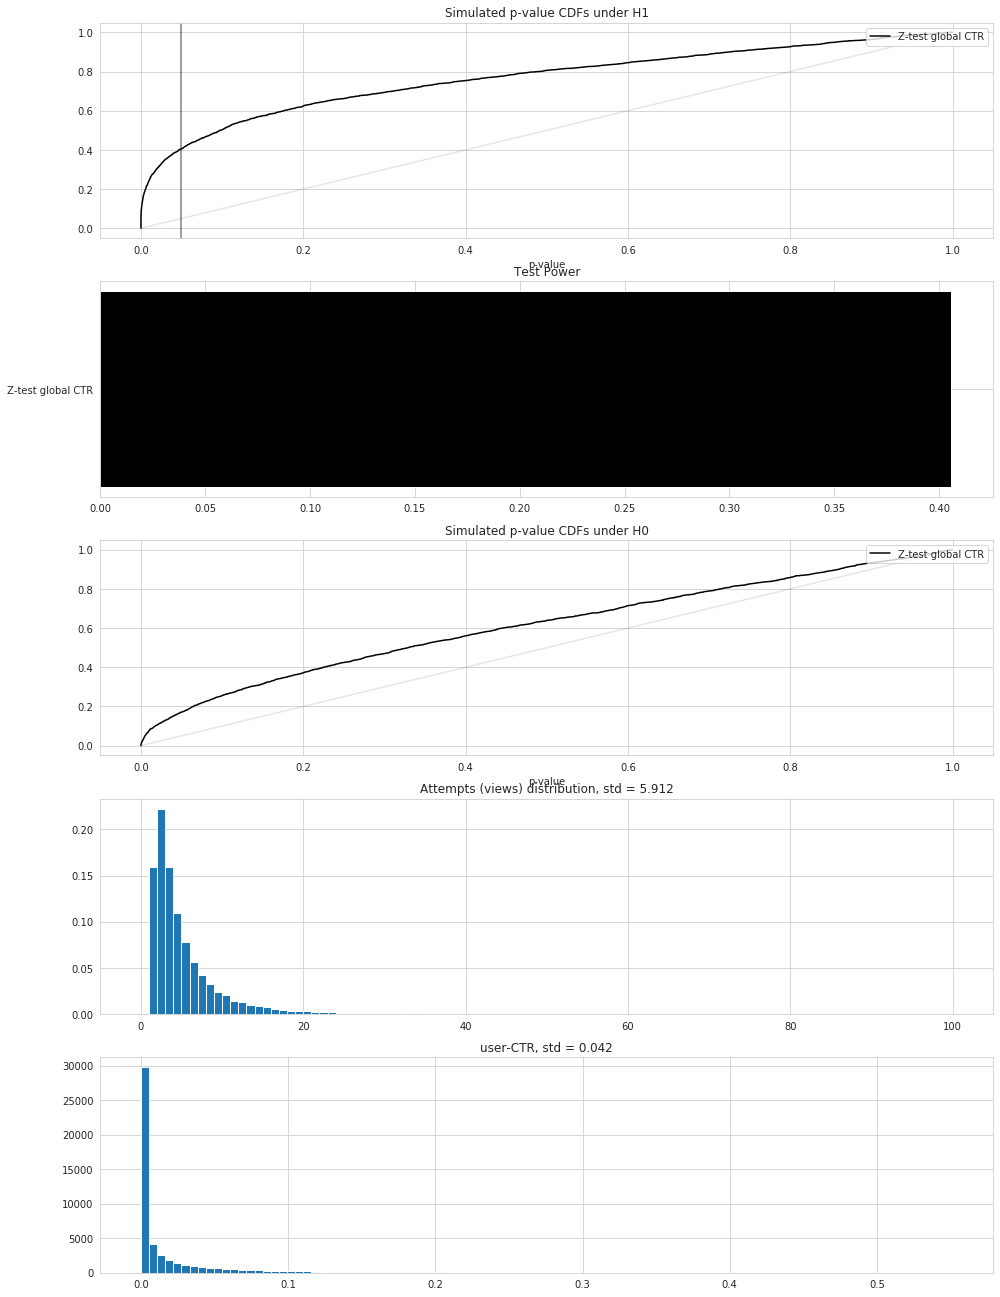

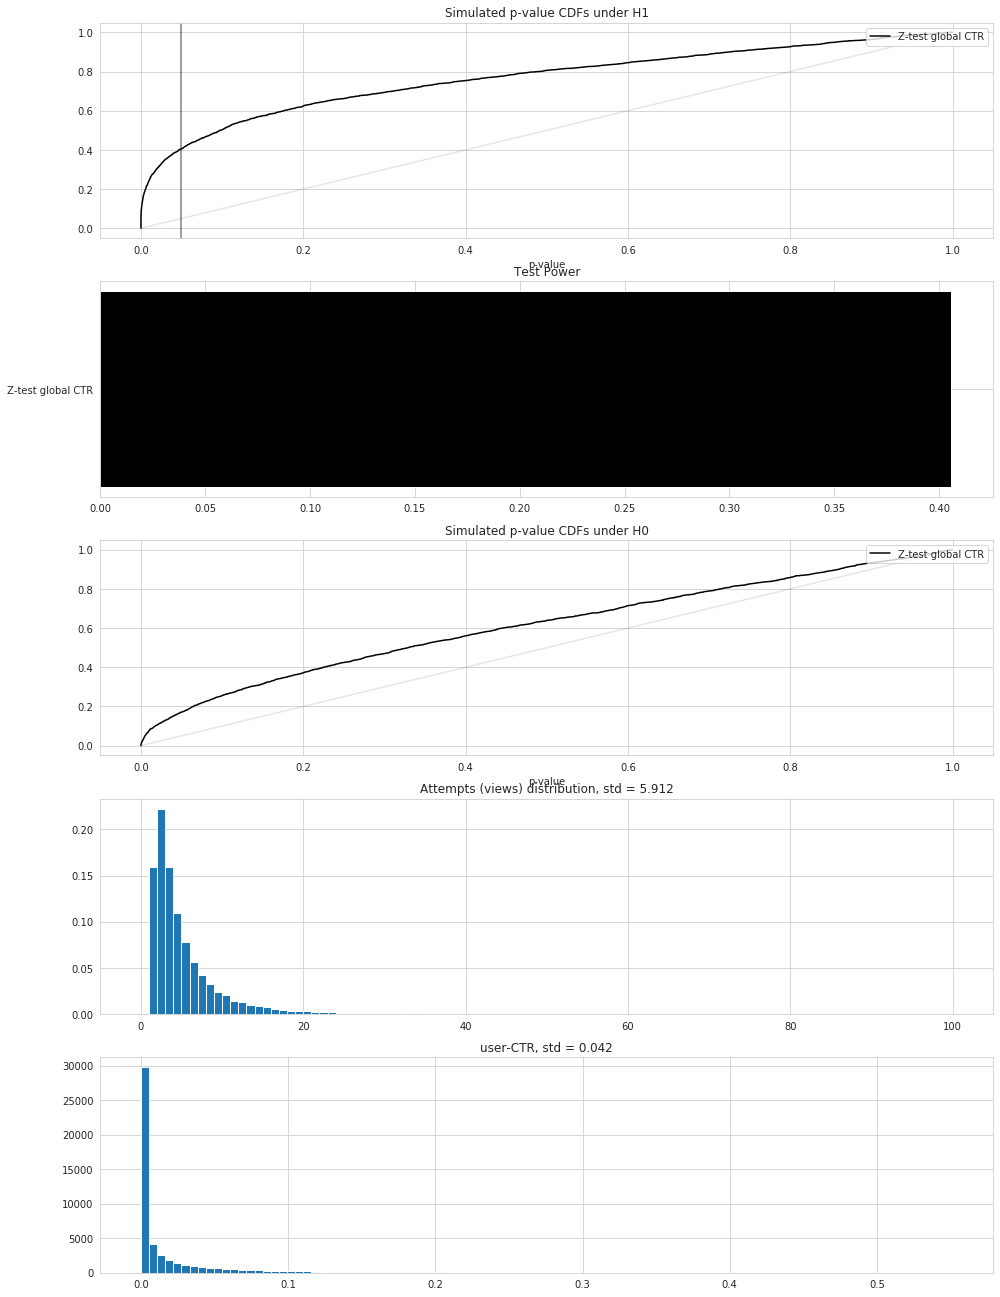

In [11]:
global_ctr_0_ab = successes_0_ab.sum(axis=1) / attempts_0_ab.sum(axis=1)
global_ctr_1_ab = successes_1_ab.sum(axis=1) / attempts_1_ab.sum(axis=1)
global_ctr_0_aa = successes_0_aa.sum(axis=1) / attempts_0_aa.sum(axis=1)
global_ctr_1_aa = successes_1_aa.sum(axis=1) / attempts_1_aa.sum(axis=1)

global_ctr_z_test_ab = proportions_diff_z_test(global_ctr_0_ab, attempts_0_ab.sum(axis=1), 
                                               global_ctr_1_ab, attempts_1_ab.sum(axis=1))
global_ctr_z_test_aa = proportions_diff_z_test(global_ctr_0_aa, attempts_0_aa.sum(axis=1), 
                                               global_ctr_1_aa, attempts_1_aa.sum(axis=1))
plot_summary({'Z-test global CTR': (global_ctr_z_test_ab, 'k-')},
             {'Z-test global CTR': (global_ctr_z_test_aa, 'k-')},
             attempts_0_ab, gt_success_rates)